In [1]:
# Credit Card Default Prediction - Data Exploration
# Notebook: 01_data_exploration.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

warnings.filterwarnings('ignore')

# Add src directory to path for importing custom modules
sys.path.append('../src/')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ====================================
# 1. LOAD DATA
# ====================================

# Load the raw data
df = pd.read_csv('../data/processed/cleaned_data.csv')
#default_of_credit_card_clients.csv
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")


Dataset loaded successfully!
Dataset shape: (30000, 24)


In [2]:

# ====================================
# 2. BASIC DATA EXPLORATION
# ====================================

# Display first few rows
print("\n=== FIRST 5 ROWS ===")
df.head()

# ====================================
# Remove ID column as it's not needed for analysis
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)
    print("ID column removed")

# Basic dataset information
print("\n=== DATASET INFO ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== DATA TYPES ===")
df.dtypes

# ====================================
print("\n=== BASIC STATISTICS ===")
df.describe()

# ====================================
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print("Missing values per column:")
missing_values[missing_values > 0] if missing_values.sum() > 0 else print("No missing values found!")



=== FIRST 5 ROWS ===

=== DATASET INFO ===
Shape: (30000, 24)
Memory usage: 5.49 MB

=== DATA TYPES ===

=== BASIC STATISTICS ===

=== MISSING VALUES ===
Missing values per column:
No missing values found!



TARGET VARIABLE ANALYSIS


<Figure size 1000x600 with 0 Axes>

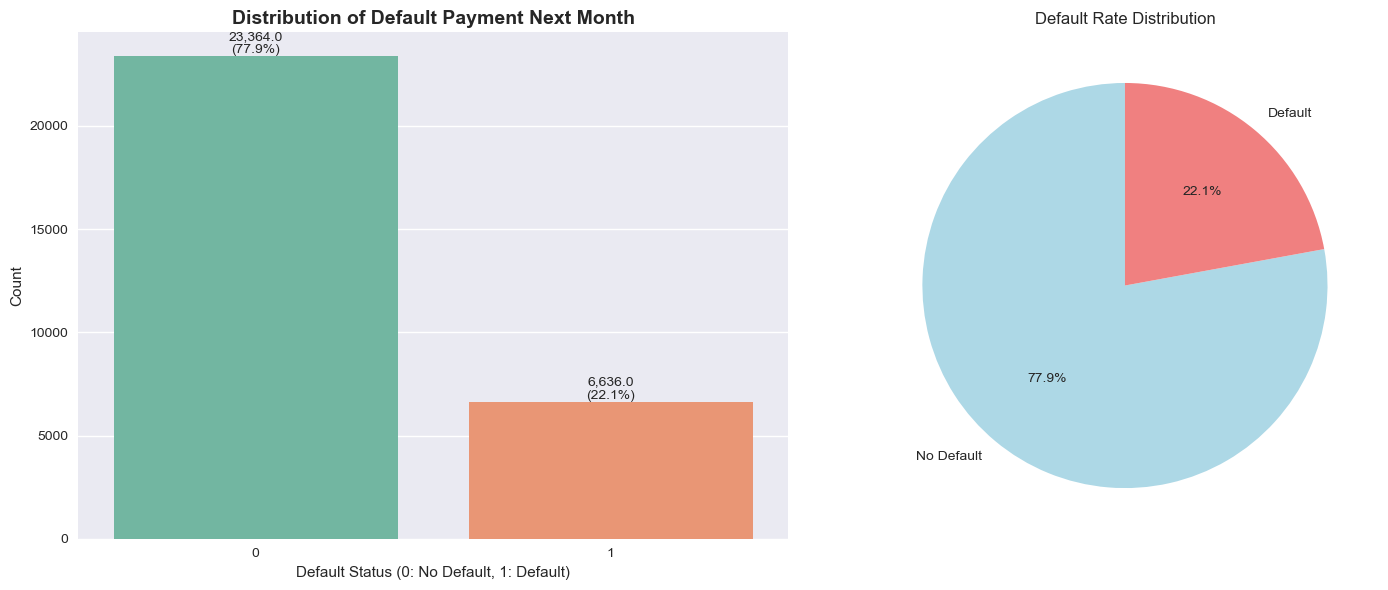

Default Rate: 22.12%
Total samples: 30,000
Default cases: 6,636
Non-default cases: 23,364


In [3]:

# ====================================
# 3. TARGET VARIABLE ANALYSIS
# ====================================

print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

# Target distribution
plt.figure(figsize=(10, 6))
target_counts = df['default.payment.next.month'].value_counts()

# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='default.payment.next.month', palette='Set2', ax=ax1)
ax1.set_title('Distribution of Default Payment Next Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Default Status (0: No Default, 1: Default)')
ax1.set_ylabel('Count')

# Add count labels on bars
for i, p in enumerate(ax1.patches):
    percentage = f'{100*target_counts.iloc[i]/len(df):.1f}%'
    ax1.annotate(f'{p.get_height():,}\n({percentage})', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Pie chart
ax2.pie(target_counts.values, labels=['No Default', 'Default'], 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Default Rate Distribution')

plt.tight_layout()
plt.savefig('../results/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Default Rate: {df['default.payment.next.month'].mean():.2%}")
print(f"Total samples: {len(df):,}")
print(f"Default cases: {target_counts[1]:,}")
print(f"Non-default cases: {target_counts[0]:,}")



DEMOGRAPHIC ANALYSIS


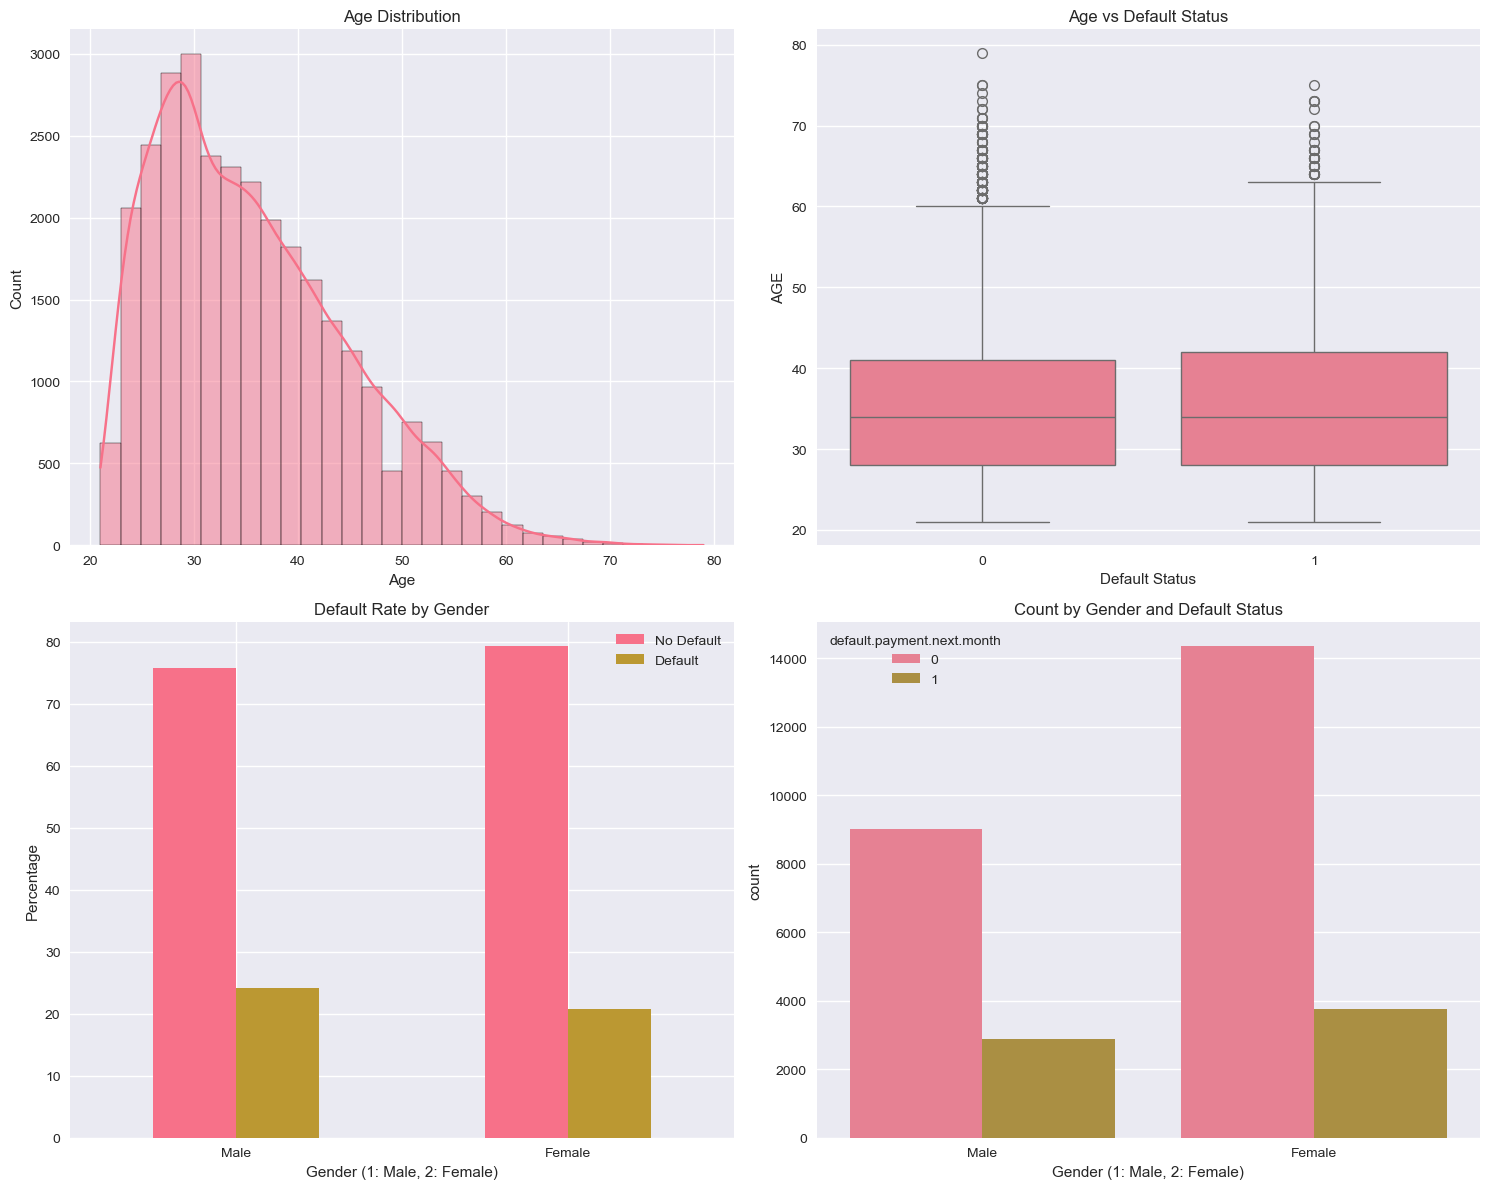


Age Statistics by Default Status:


,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,28.0,34.0,41.0,79.0
1,6636.0,35.725738,9.693438,21.0,28.0,34.0,42.0,75.0


In [4]:

# ====================================
# 4. DEMOGRAPHIC ANALYSIS
# ====================================

print("\n" + "="*50)
print("DEMOGRAPHIC ANALYSIS")
print("="*50)

# Age analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
sns.histplot(data=df, x='AGE', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')

# Age vs Default
sns.boxplot(data=df, x='default.payment.next.month', y='AGE', ax=axes[0,1])
axes[0,1].set_title('Age vs Default Status')
axes[0,1].set_xlabel('Default Status')

# Gender analysis
gender_default = pd.crosstab(df['SEX'], df['default.payment.next.month'], normalize='index') * 100
gender_default.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Default Rate by Gender')
axes[1,0].set_xlabel('Gender (1: Male, 2: Female)')
axes[1,0].set_ylabel('Percentage')
axes[1,0].set_xticklabels(['Male', 'Female'], rotation=0)
axes[1,0].legend(['No Default', 'Default'])

# Gender count
sns.countplot(data=df, x='SEX', hue='default.payment.next.month', ax=axes[1,1])
axes[1,1].set_title('Count by Gender and Default Status')
axes[1,1].set_xlabel('Gender (1: Male, 2: Female)')
axes[1,1].set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.savefig('../results/figures/demographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Age statistics by default status
print("\nAge Statistics by Default Status:")
age_stats = df.groupby('default.payment.next.month')['AGE'].describe()
age_stats



EDUCATION & MARRIAGE ANALYSIS
Education counts: EDUCATION
1    10599
2    14030
3     4917
4      454
Name: count, dtype: int64
Education labels: ['Graduate', 'University', 'High School', 'Others']
Any NaN values: False
Any zero values: False


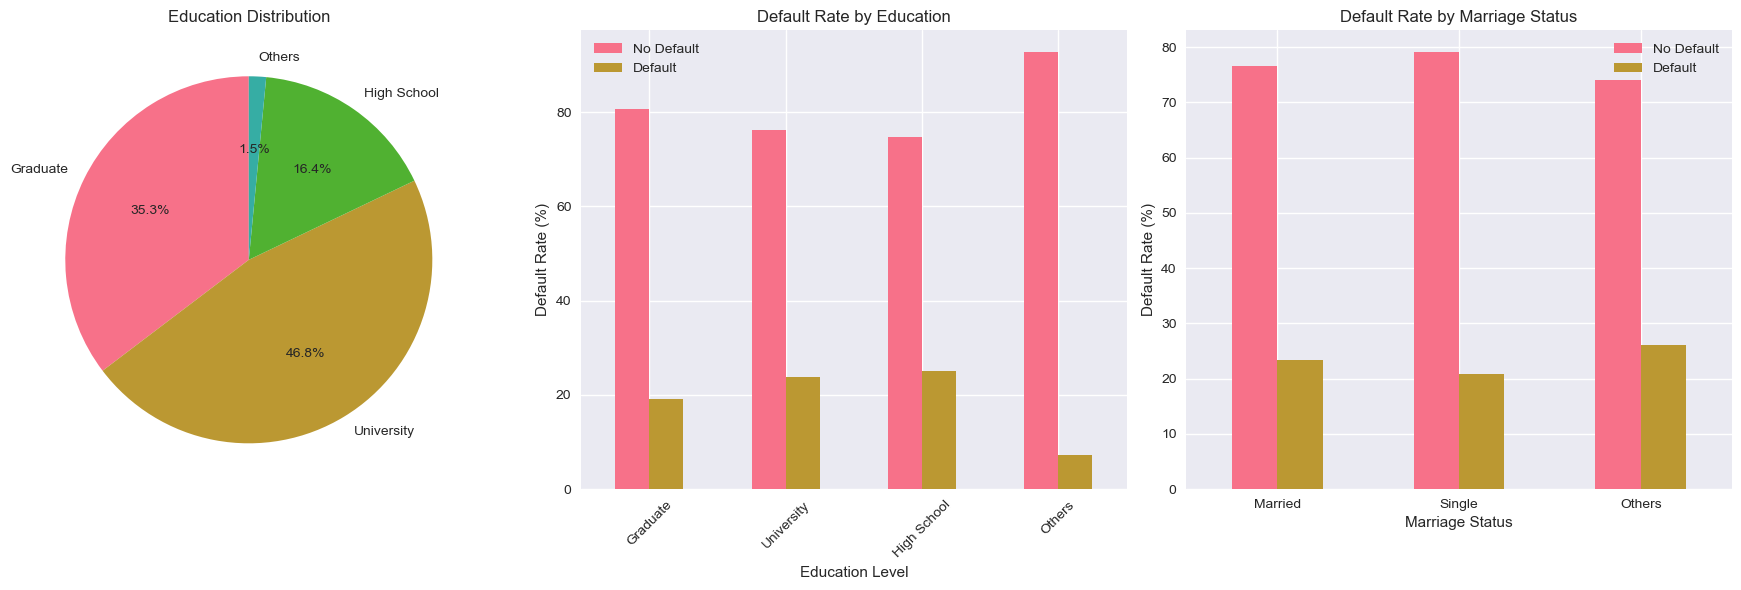


Education Distribution:
EDUCATION
1    10599
2    14030
3     4917
4      454
Name: count, dtype: int64

Marriage Distribution:
MARRIAGE
1    13713
2    15964
3      323
Name: count, dtype: int64


In [5]:

# ====================================
# 5. EDUCATION & MARRIAGE ANALYSIS
# ====================================

print("\n" + "="*50)
print("EDUCATION & MARRIAGE ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Education distribution
edu_counts = df['EDUCATION'].value_counts().sort_index()
edu_labels = ['Graduate', 'University', 'High School', 'Others']
print("Education counts:", edu_counts)
print("Education labels:", edu_labels)
print("Any NaN values:", edu_counts.isna().any())
print("Any zero values:", (edu_counts == 0).any())

# Filter out zero/NaN values
mask = (edu_counts > 0) & (~edu_counts.isna())
edu_counts_clean = edu_counts[mask]
axes[0].pie(edu_counts.values, labels=edu_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Education Distribution')

# Education vs Default
edu_default = pd.crosstab(df['EDUCATION'], df['default.payment.next.month'], normalize='index') * 100
edu_default.plot(kind='bar', ax=axes[1])
axes[1].set_title('Default Rate by Education')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Default Rate (%)')
axes[1].set_xticklabels(['Graduate', 'University', 'High School', 'Others'], rotation=45)
axes[1].legend(['No Default', 'Default'])

# Marriage vs Default
marriage_default = pd.crosstab(df['MARRIAGE'], df['default.payment.next.month'], normalize='index') * 100
marriage_default.plot(kind='bar', ax=axes[2])
axes[2].set_title('Default Rate by Marriage Status')
axes[2].set_xlabel('Marriage Status')
axes[2].set_ylabel('Default Rate (%)')
axes[2].set_xticklabels(['Married', 'Single', 'Others'], rotation=0)
axes[2].legend(['No Default', 'Default'])

plt.tight_layout()
plt.savefig('../results/figures/education_marriage_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print education and marriage statistics
print("\nEducation Distribution:")
print(df['EDUCATION'].value_counts().sort_index())
print("\nMarriage Distribution:")
print(df['MARRIAGE'].value_counts().sort_index())



CREDIT LIMIT ANALYSIS


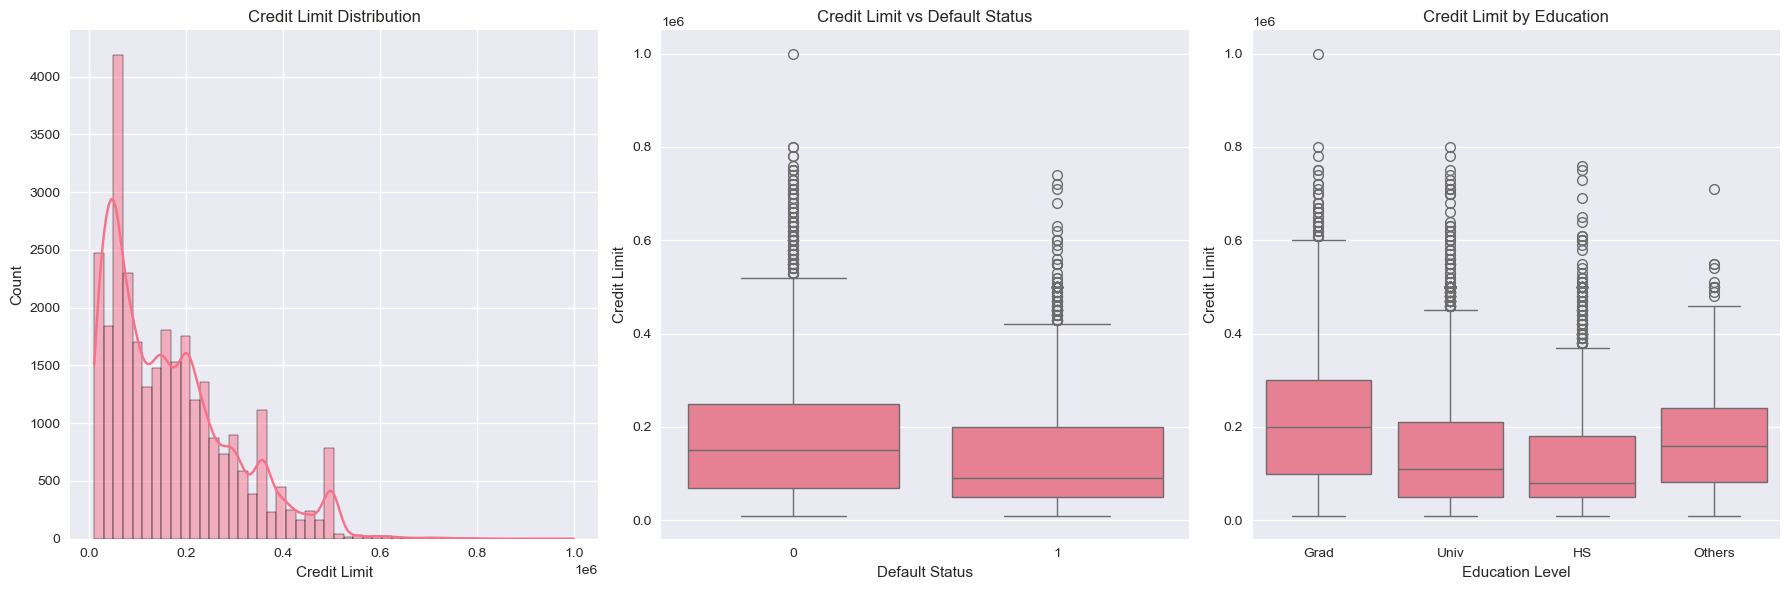


Credit Limit Statistics:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Credit Limit by Default Status:


,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


In [6]:

# ====================================
# 6. CREDIT LIMIT ANALYSIS
# ====================================

print("\n" + "="*50)
print("CREDIT LIMIT ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Credit limit distribution
sns.histplot(data=df, x='LIMIT_BAL', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Credit Limit Distribution')
axes[0].set_xlabel('Credit Limit')

# Credit limit vs Default
sns.boxplot(data=df, x='default.payment.next.month', y='LIMIT_BAL', ax=axes[1])
axes[1].set_title('Credit Limit vs Default Status')
axes[1].set_xlabel('Default Status')
axes[1].set_ylabel('Credit Limit')

# Credit limit by education
sns.boxplot(data=df, x='EDUCATION', y='LIMIT_BAL', ax=axes[2])
axes[2].set_title('Credit Limit by Education')
axes[2].set_xlabel('Education Level')
axes[2].set_xticklabels(['Grad', 'Univ', 'HS', 'Others'])
axes[2].set_ylabel('Credit Limit')

plt.tight_layout()
plt.savefig('../results/figures/credit_limit_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Credit limit statistics
print("\nCredit Limit Statistics:")
print(df['LIMIT_BAL'].describe())

print("\nCredit Limit by Default Status:")
limit_by_default = df.groupby('default.payment.next.month')['LIMIT_BAL'].describe()
limit_by_default



PAYMENT STATUS ANALYSIS


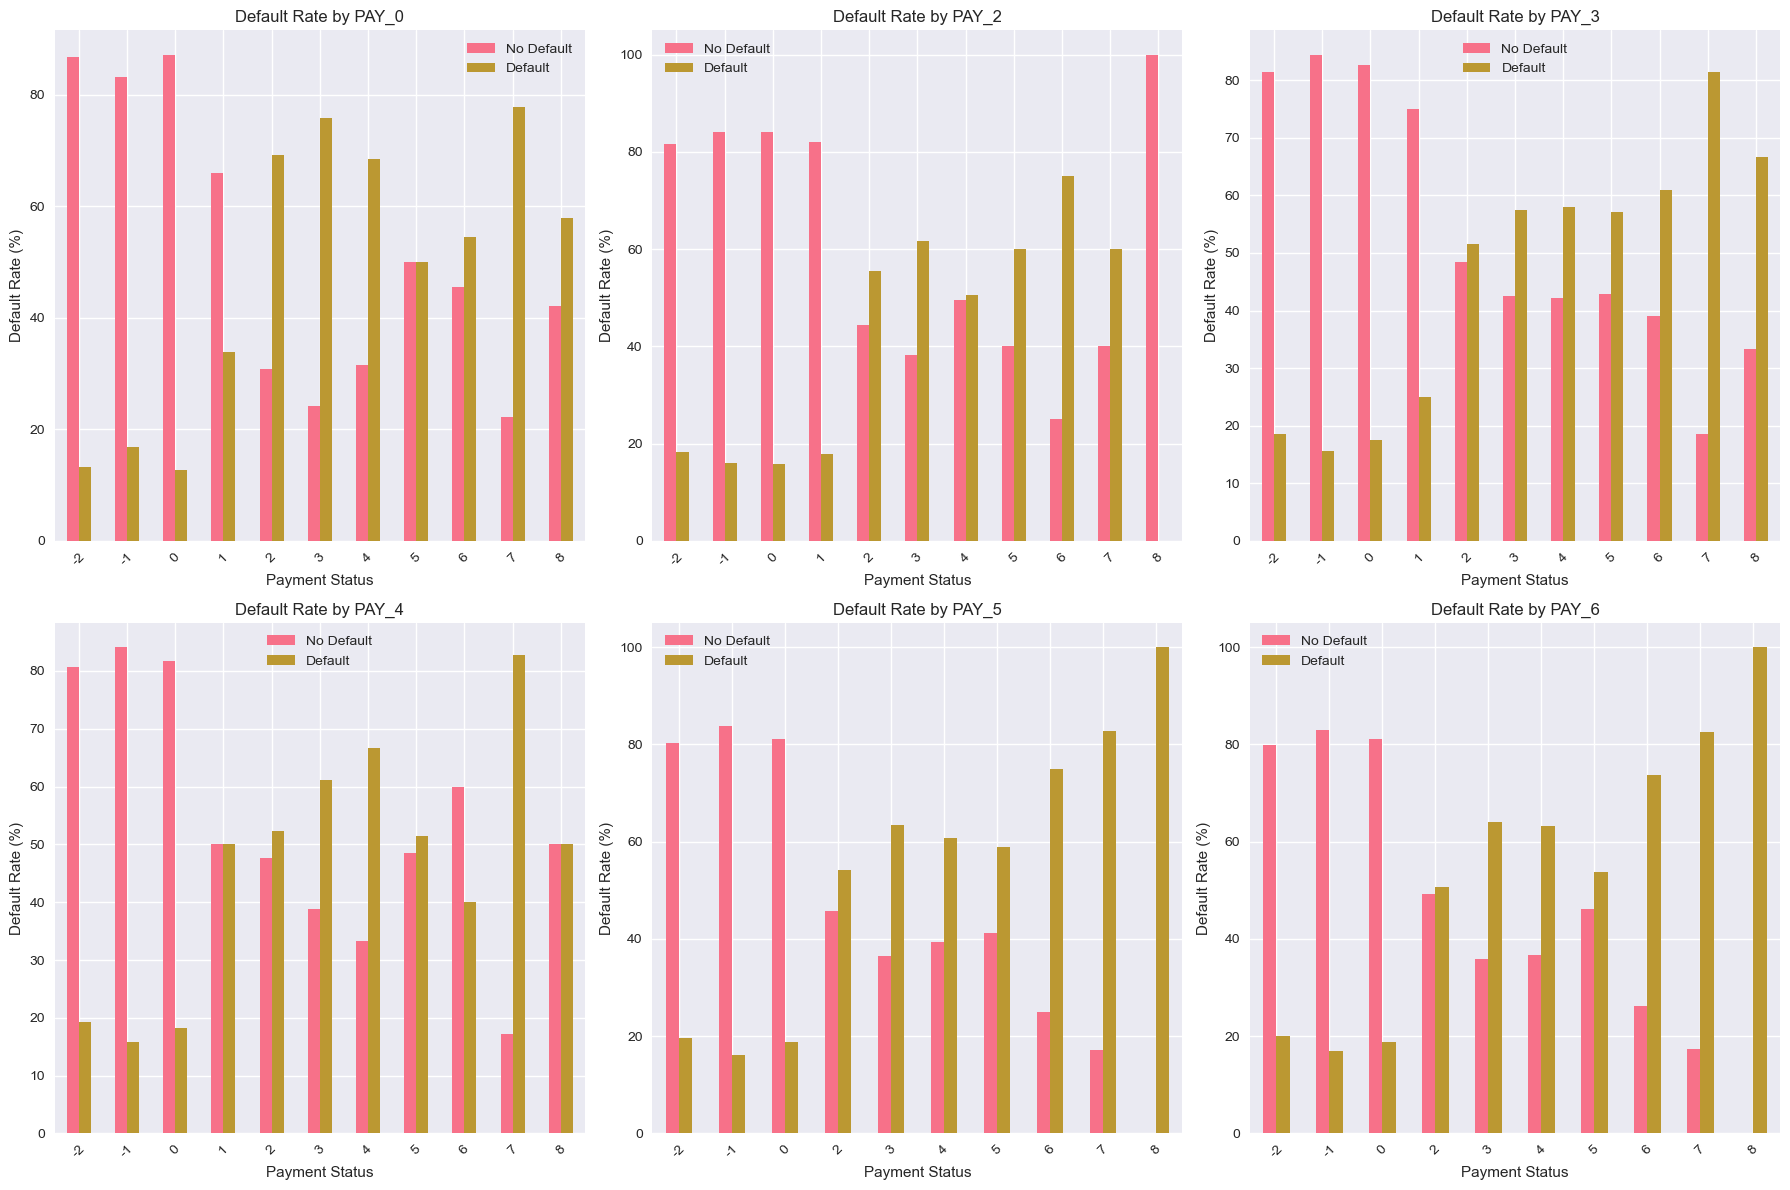

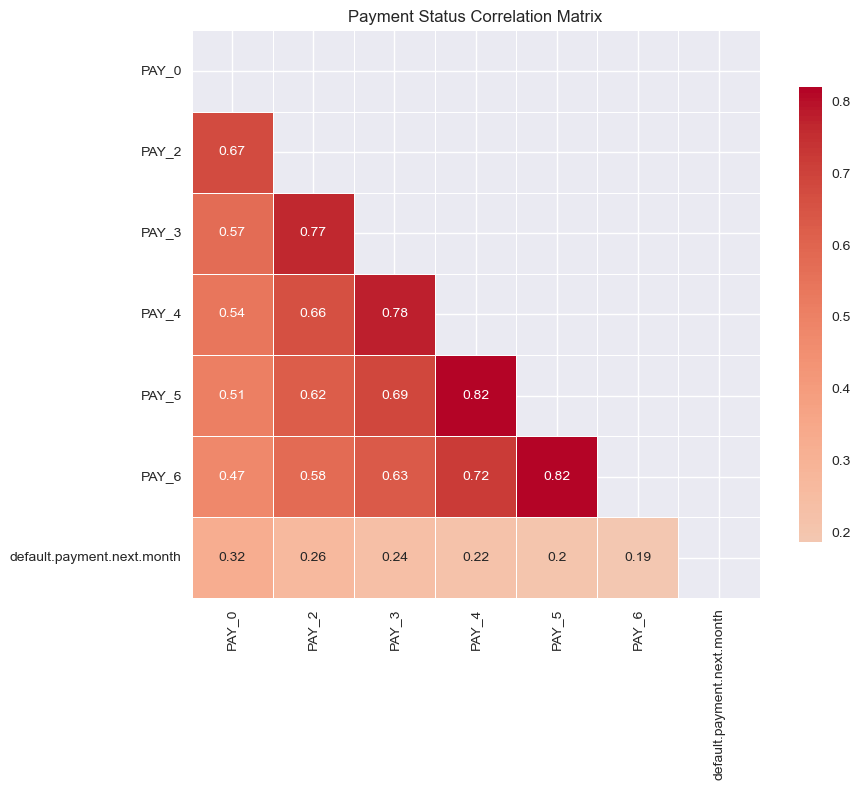

In [7]:

# ====================================
# 7. PAYMENT STATUS ANALYSIS
# ====================================

print("\n" + "="*50)
print("PAYMENT STATUS ANALYSIS")
print("="*50)

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Payment status vs default rate
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(pay_cols):
    pay_default = pd.crosstab(df[col], df['default.payment.next.month'], normalize='index') * 100
    pay_default.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Default Rate by {col}')
    axes[i].set_xlabel('Payment Status')
    axes[i].set_ylabel('Default Rate (%)')
    axes[i].legend(['No Default', 'Default'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/figures/payment_status_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Payment status correlation heatmap
plt.figure(figsize=(10, 8))
pay_corr = df[pay_cols + ['default.payment.next.month']].corr()
mask = np.triu(np.ones_like(pay_corr, dtype=bool))
sns.heatmap(pay_corr, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Payment Status Correlation Matrix')
plt.tight_layout()
plt.savefig('../results/figures/payment_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()



BILL vs PAYMENT AMOUNT ANALYSIS


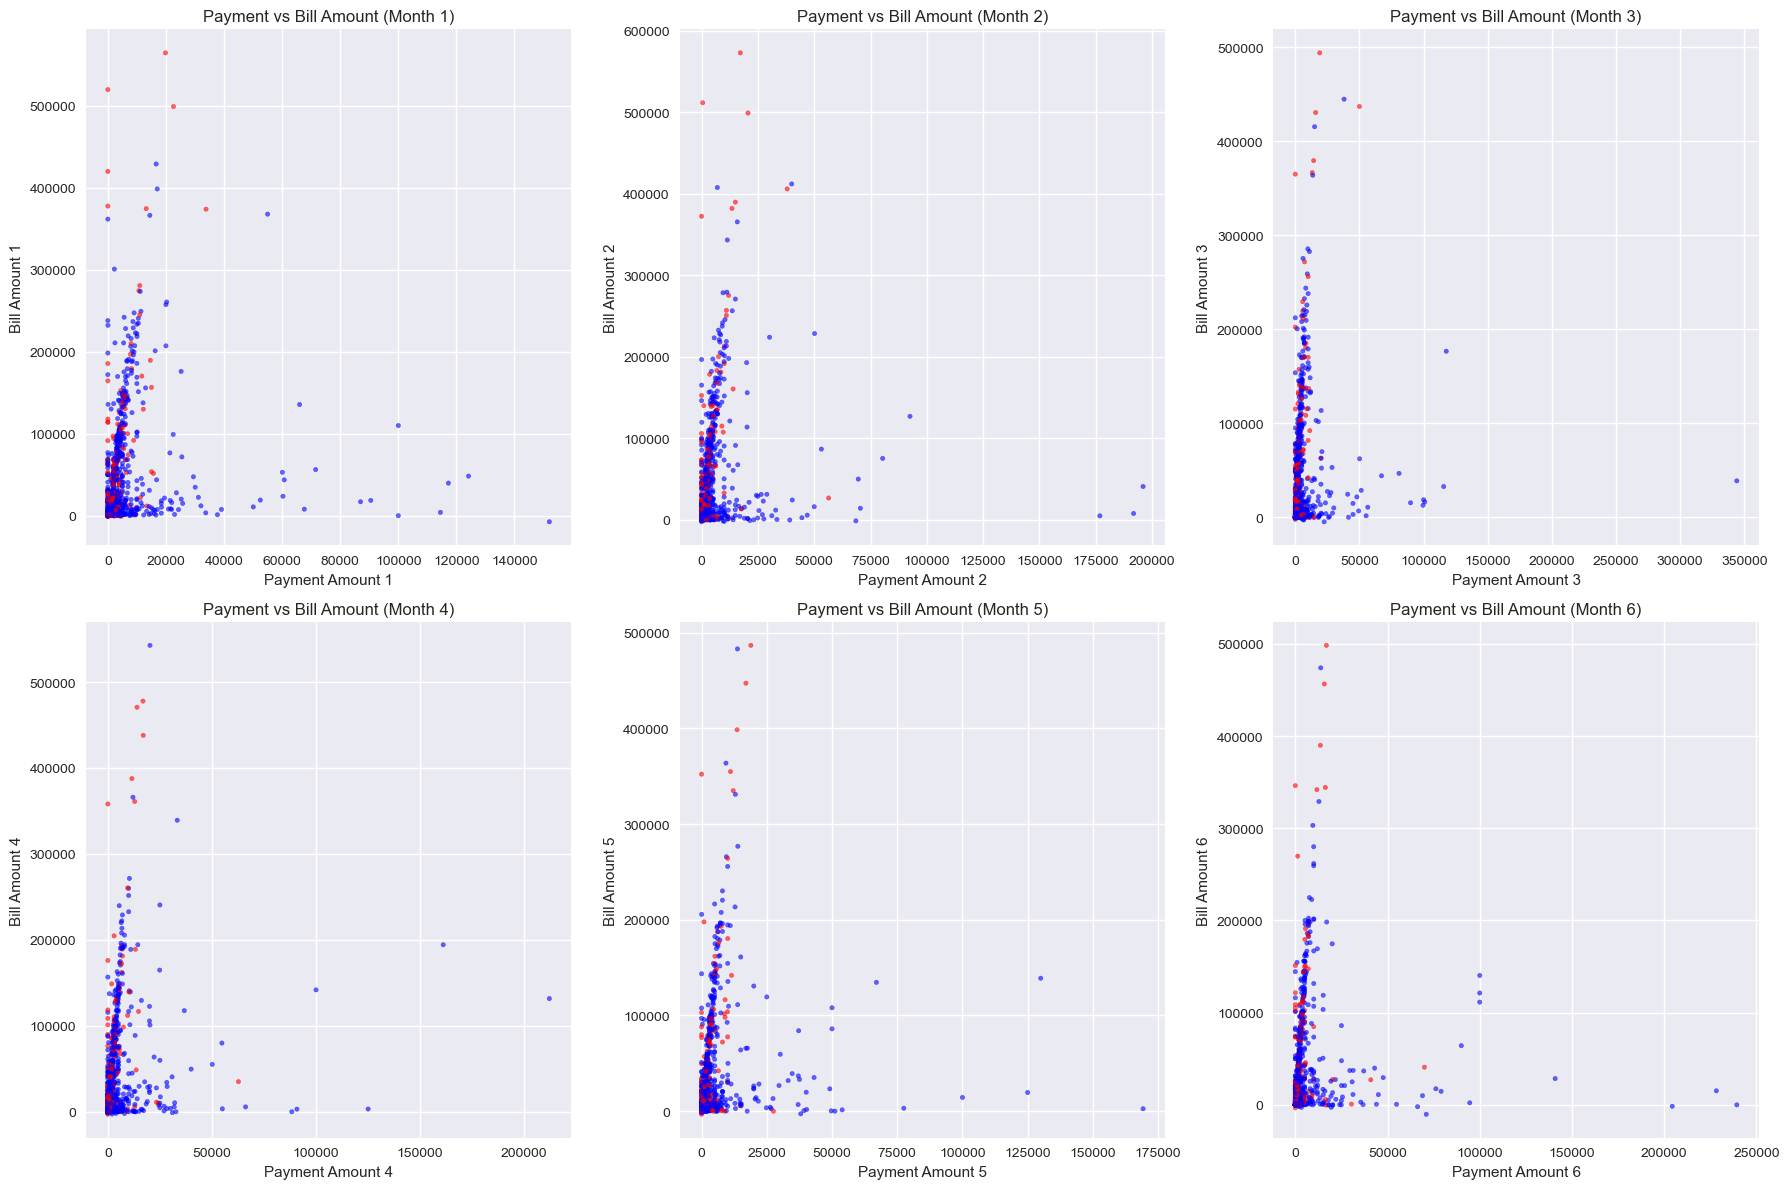

In [8]:

# ====================================
# 8. BILL AMOUNT vs PAYMENT AMOUNT ANALYSIS
# ====================================

print("\n" + "="*50)
print("BILL vs PAYMENT AMOUNT ANALYSIS")
print("="*50)

bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Sample data for visualization (to avoid overcrowding)
sample_size = min(1000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i in range(6):
    colors = ['red' if x == 1 else 'blue' for x in sample_df['default.payment.next.month']]
    axes[i].scatter(sample_df[pay_amt_cols[i]], sample_df[bill_cols[i]], 
                   c=colors, alpha=0.6, s=10)
    axes[i].set_xlabel(f'Payment Amount {i+1}')
    axes[i].set_ylabel(f'Bill Amount {i+1}')
    axes[i].set_title(f'Payment vs Bill Amount (Month {i+1})')

plt.tight_layout()
plt.savefig('../results/figures/bill_payment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



FEATURE CORRELATION ANALYSIS


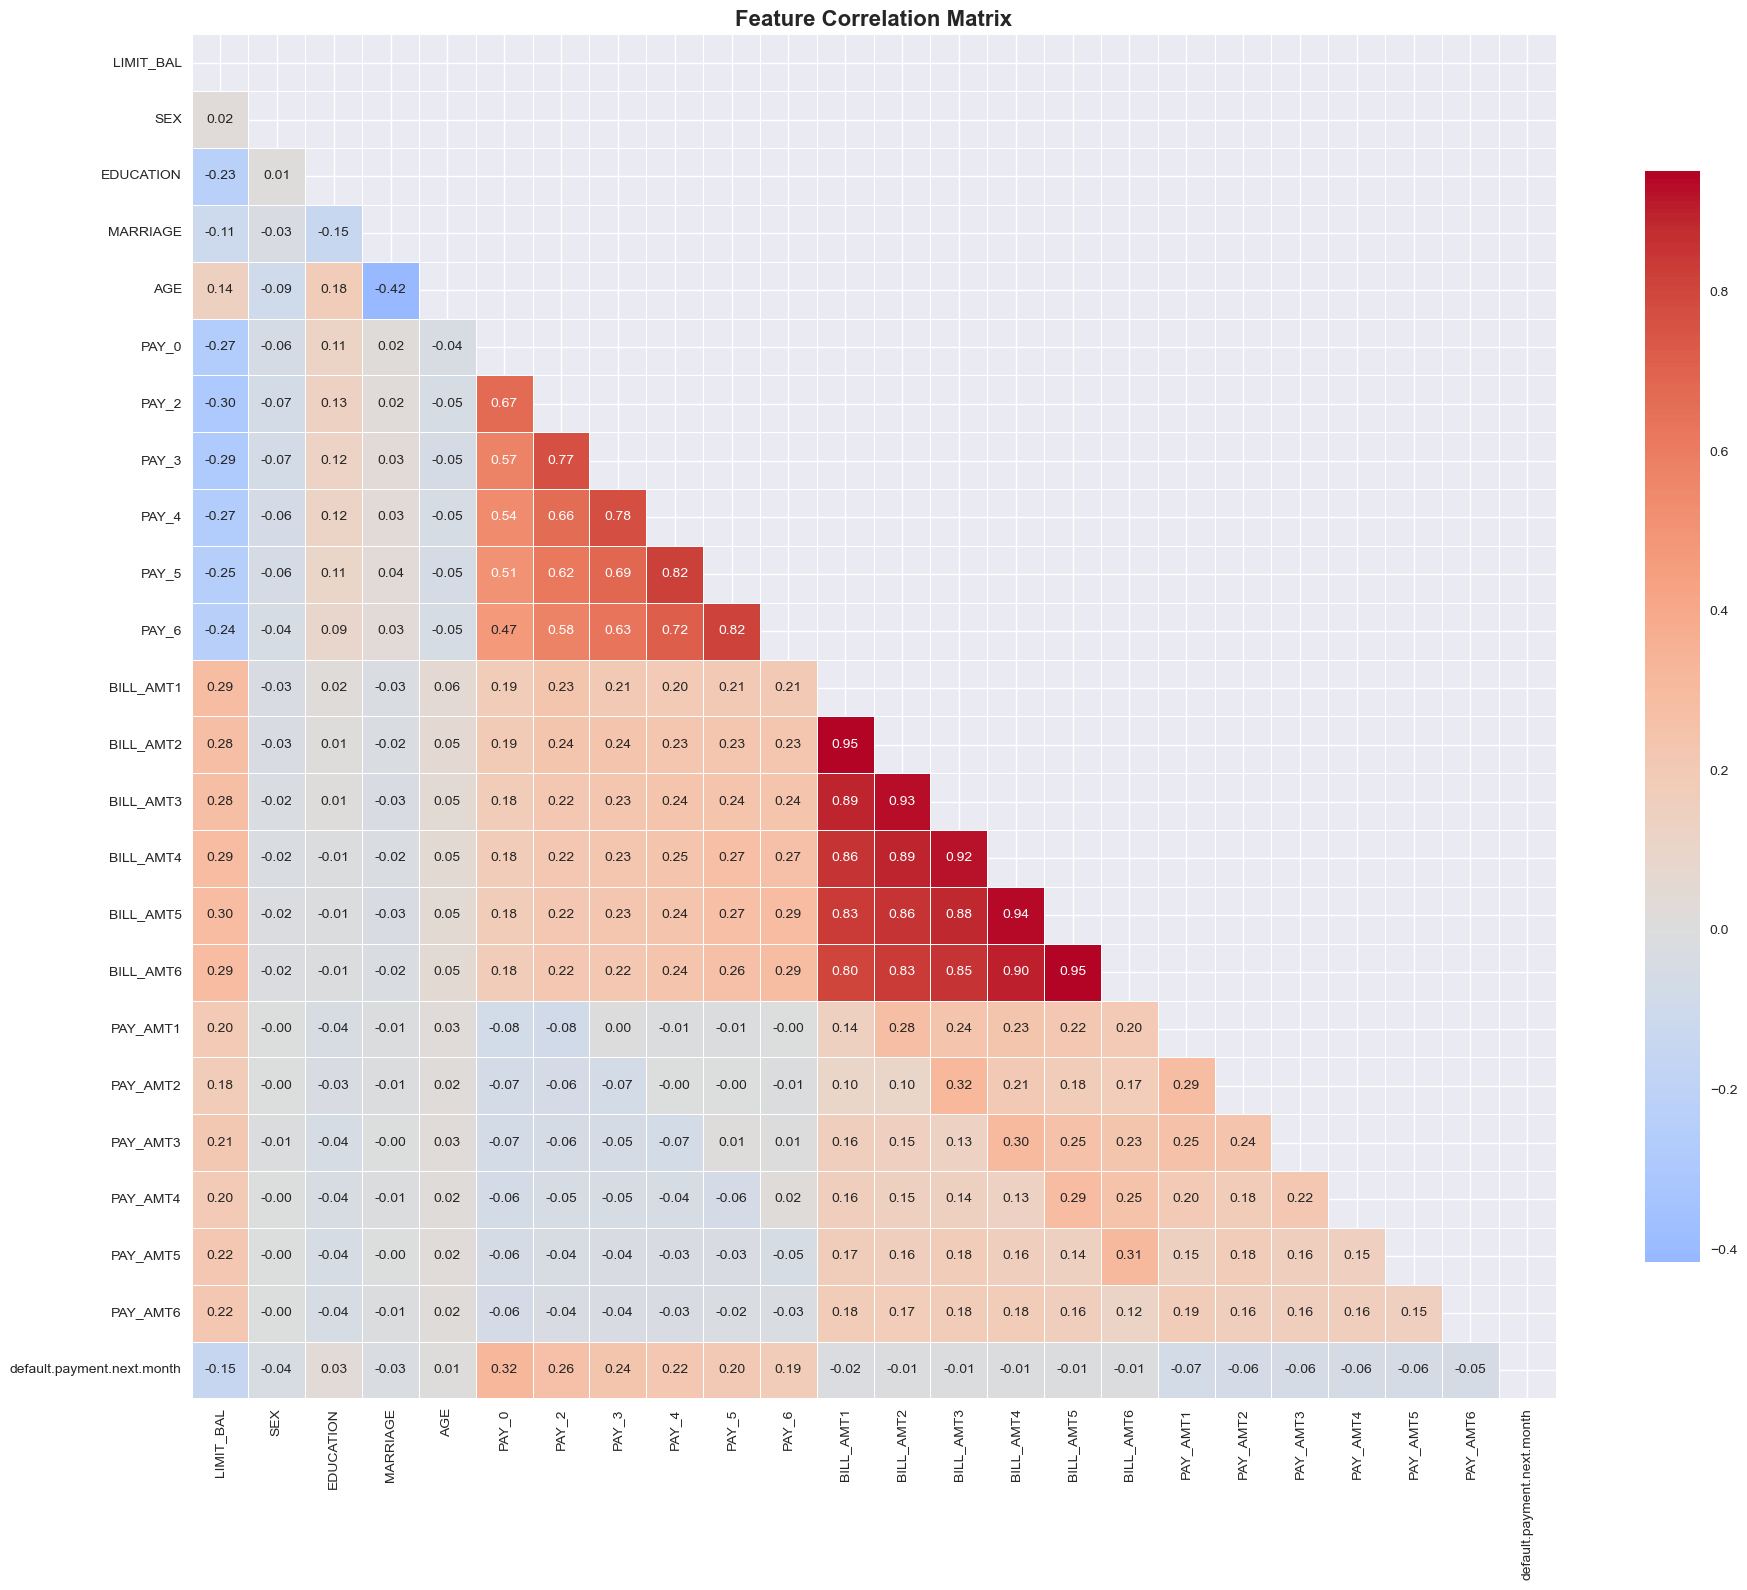


=== TOP 10 FEATURES CORRELATED WITH DEFAULT ===
default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
LIMIT_BAL                     0.153520
PAY_AMT1                      0.072929
PAY_AMT2                      0.058579
PAY_AMT4                      0.056827
Name: default.payment.next.month, dtype: float64

=== STRONG CORRELATIONS (> 0.5) ===
BILL_AMT1  BILL_AMT2    0.951484
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT5  BILL_AMT6    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT5  BILL_AMT4    0.940134
BILL_AMT3  BILL_AMT2    0.928326
BILL_AMT2  BILL_AMT3    0.928326
BILL_AMT4  BILL_AMT3    0.923969
BILL_AMT3  BILL_AMT4    0.923969
dtype: float64


In [9]:

# ====================================
# 9. COMPREHENSIVE CORRELATION ANALYSIS
# ====================================

print("\n" + "="*50)
print("FEATURE CORRELATION ANALYSIS")
print("="*50)

# Full correlation matrix
plt.figure(figsize=(20, 16))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/full_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target variable
target_corr = df.corr()['default.payment.next.month'].abs().sort_values(ascending=False)
print("\n=== TOP 10 FEATURES CORRELATED WITH DEFAULT ===")
print(target_corr.head(11))  # 11 because target itself will be first

# Strong correlations (> 0.5)
strong_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 1.0]  # Remove self-correlations
strong_corr = strong_corr[strong_corr > 0.5]  # Only strong correlations

if len(strong_corr) > 0:
    print(f"\n=== STRONG CORRELATIONS (> 0.5) ===")
    print(strong_corr.head(10))
else:
    print("\nNo strong correlations (> 0.5) found between features.")


In [10]:

# ====================================
# 10. SUMMARY STATISTICS
# ====================================

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1] - 1}")  # Excluding target
print(f"Number of Samples: {df.shape[0]:,}")
print(f"Default Rate: {df['default.payment.next.month'].mean():.2%}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Feature types summary
print(f"\nFeature Types:")
print(f"- Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"- Categorical features: {len(df.select_dtypes(exclude=[np.number]).columns)}")

print("\n" + "="*50)
print("DATA EXPLORATION COMPLETE!")
print("="*50)
print("All visualizations saved to: ../results/figures/")
print("Ready for data preprocessing phase!")


SUMMARY STATISTICS
Dataset Shape: (30000, 24)
Number of Features: 23
Number of Samples: 30,000
Default Rate: 22.12%
Memory Usage: 5.49 MB

Feature Types:
- Numerical features: 24
- Categorical features: 0

DATA EXPLORATION COMPLETE!
All visualizations saved to: ../results/figures/
Ready for data preprocessing phase!
